# Julia for Bioinformatics & Biostatistics Portfolio

This notebook demonstrates **data analysis, visualization, and bioinformatics workflows** using **Julia**.  
It will showcase applications in **clinical data analysis, genomics, and systems biology**, and serve as
a complementary portfolio alongside the R-based notebook.

---

## 1. Basic Setup and Descriptive Statistics in Julia

In [10]:
# Import core packages
using Statistics
using DataFrames
using Plots

# Example dataset: Patient Blood Pressure (mmHg)
blood_pressure = [120, 130, 128, 135, 140, 125, 138, 142, 150, 132]

# Summary statistics
mean_bp = mean(blood_pressure)
median_bp = median(blood_pressure)
sd_bp = std(blood_pressure)

println("Mean BP: ", mean_bp)
println("Median BP: ", median_bp)
println("Standard Deviation: ", sd_bp)

Mean BP: 134.0
Median BP: 133.5
Standard Deviation: 8.856886837057615


In [3]:
using Pkg
Pkg.add("StatsPlots")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed Distances ───────── v0.10.12
   Installed FFTW ────────────── v1.10.0
   Installed Enzyme_jll ──────── v0.0.199+0
   Installed DataStructures ──── v0.18.22
   Installed NearestNeighbors ── v0.4.22
   Installed LuxLib ──────────── v1.12.0
   Installed Enzyme ──────────── v0.13.78
   Installed Clustering ──────── v0.15.8
   Installed ReactantCore ────── v0.1.16
   Installed Interpolations ──── v0.15.1
   Installed Arpack_jll ──────── v3.5.1+1
   Installed Widgets ─────────── v0.6.7
   Installed TableOperations ─── v1.2.0
   Installed MultivariateStats ─ v0.10.3
   Installed StatsPlots ──────── v0.15.7
   Installed Arpack ──────────── v0.5.4
    Updating `~/.julia/environments/v1.11/Project.toml`
  [f3b207a7] + StatsPlots v0.15.7
    Updating `~/.julia/environments/v1.11/Manifest.toml`
  [7d9fca2a] + Arpack v0.5.4
  [62783981] - BitTwiddlingConvenienceFunctions v0.1.6
  [fb6a15b2] - C

In [11]:
using DataFrames
using Statistics
using StatsPlots   # instead of using only Plots

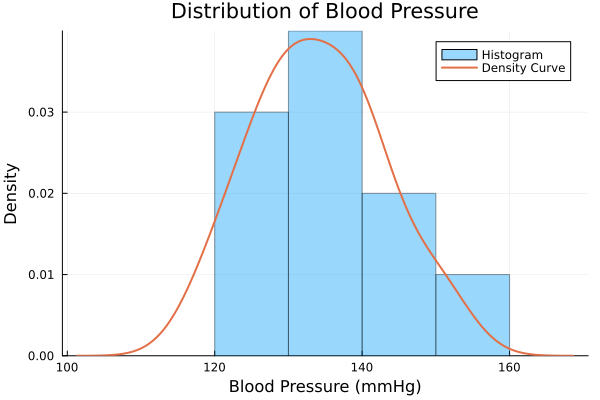

In [12]:
# Blood pressure example
blood_pressure = [120, 130, 128, 135, 140, 125, 138, 142, 150, 132]
df = DataFrame(BP = blood_pressure)

# Histogram + density in one plot
@df df histogram(:BP, bins=5, normalize=true, alpha=0.4, label="Histogram",
                 xlabel="Blood Pressure (mmHg)", ylabel="Density",
                 title="Distribution of Blood Pressure")
@df df density!(:BP, lw=2, label="Density Curve")

## 2. Clinical Trial Group Comparison in Julia

We simulate a simple dataset:
- Two groups: **Treatment** and **Control**
- Outcome: biomarker reduction
We then perform:
1. Summary statistics
2. Statistical testing
3. Visualization (Boxplot + Violin overlay)

In [14]:
using Random, Statistics, DataFrames, Plots

# Set seed
Random.seed!(123)

# Simulate gene expression dataset
n_genes = 30     # rows
n_samples = 8    # columns
expr_matrix = rand(100:1000, n_genes, n_samples)

# Log transform (simplest normalization)
expr_log = log.(expr_matrix .+ 1)

# Create DataFrame with gene/sample labels
genes = ["Gene_$i" for i in 1:n_genes]
samples = ["Sample_$i" for i in 1:n_samples]

df_expr = DataFrame(expr_log, :auto)
rename!(df_expr, Symbol.(samples))
df_expr.Gene = genes

first(df_expr, 5)

Row,Sample_1,Sample_2,Sample_3,Sample_4,Sample_5,Sample_6,Sample_7,Sample_8,Gene
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,String
1,6.34564,5.65599,6.20254,6.60123,6.88653,6.2634,6.36303,4.80402,Gene_1
2,6.44413,5.20401,5.62762,6.80461,6.48311,6.53379,6.78672,5.92693,Gene_2
3,6.80572,6.43775,6.44254,6.52942,6.47235,6.52503,5.46383,6.63068,Gene_3
4,5.60947,5.9428,6.41017,5.17615,6.62274,6.58755,6.90375,6.27852,Gene_4
5,6.35263,5.34711,6.2519,5.45959,6.64769,6.16121,6.59578,5.64545,Gene_5


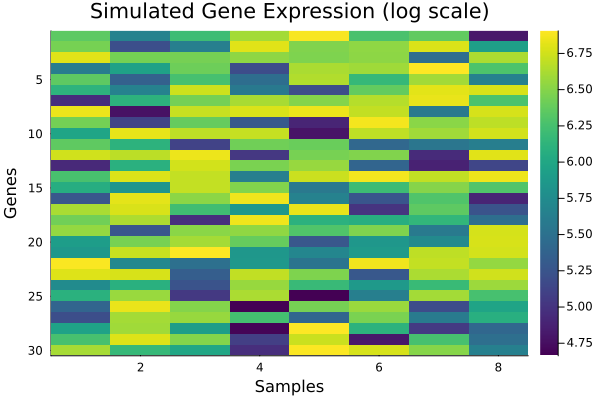

In [15]:
heatmap(expr_log,
        xlabel="Samples",
        ylabel="Genes",
        yflip=true,
        c=:viridis,
        title="Simulated Gene Expression (log scale)")

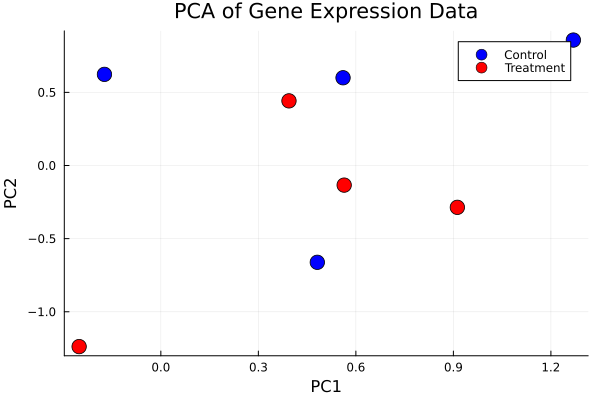

In [16]:
using LinearAlgebra, Plots

# expr_log is from Snippet 3
# Rows = genes, Columns = samples

# Center the data (important for PCA)
X = expr_log .- mean(expr_log, dims=1)

# Perform SVD (basis for PCA)
U, S, Vt = svd(X)

# Principal Components: project samples
pc_scores = X * Vt'   # rows=genes, cols=PCs

# Take the first 2 PCs (samples perspective)
pc1 = pc_scores[:, 1]
pc2 = pc_scores[:, 2]

# Assign sample groups (e.g. 4 control, 4 treatment)
groups = vcat(fill("Control", 4), fill("Treatment", 4))
colors = map(g -> g == "Control" ? :blue : :red, groups)

# Scatter plot
scatter(pc1, pc2,
        group=groups,
        xlabel="PC1",
        ylabel="PC2",
        title="PCA of Gene Expression Data",
        legend=:topright,
        color=colors,
        markerstrokecolor=:black,
        markersize=8)

Hierarchical clustering merges (sample indices):
Any[([6], [8], 3.4041529545110993), ([1], [6, 8], 4.043077451353135), ([1, 6, 8], [7], 4.391165942085923), ([1, 6, 8, 7], [3], 4.5495425854956455), ([1, 6, 8, 7, 3], [2], 5.04457333803255), ([1, 6, 8, 7, 3, 2], [5], 5.185475758214149), ([1, 6, 8, 7, 3, 2, 5], [4], 5.355813434051647)]


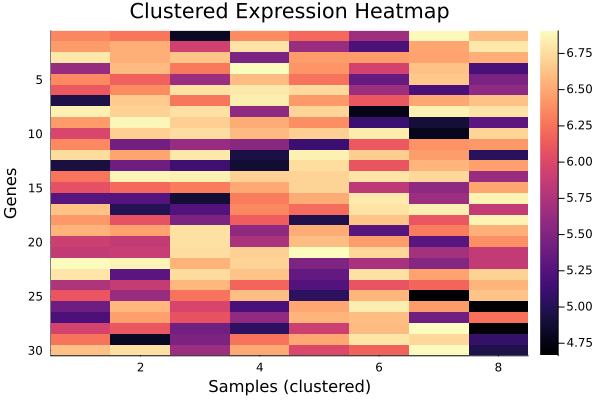

In [17]:
using Statistics, LinearAlgebra, Plots

# Distance matrix between samples (Euclidean on log-expression)
dist_matrix = [norm(expr_log[:,i] - expr_log[:,j]) for i in 1:size(expr_log,2), j in 1:size(expr_log,2)]

# A crude hierarchical clustering: average linkage
# (no external package to keep it light)
function simple_hclust(D::Matrix)
    clusters = [[i] for i in 1:size(D,1)]
    merges = []
    while length(clusters) > 1
        # find closest pair
        min_d, idx = Inf, (0,0)
        for i in 1:length(clusters), j in (i+1):length(clusters)
            d = mean(D[x,y] for x in clusters[i], y in clusters[j])
            if d < min_d
                min_d, idx = d, (i,j)
            end
        end
        push!(merges, (clusters[idx[1]], clusters[idx[2]], min_d))
        # merge
        clusters[idx[1]] = vcat(clusters[idx[1]], clusters[idx[2]])
        deleteat!(clusters, idx[2])
    end
    return merges
end

merges = simple_hclust(dist_matrix)
println("Hierarchical clustering merges (sample indices):")
println(merges)

# Heatmap reordered by clustering (first cluster of merges)
order = vcat(merges[end][1], merges[end][2])
heatmap(expr_log[:, order],
        xlabel="Samples (clustered)",
        ylabel="Genes",
        yflip=true,
        c=:magma,
        title="Clustered Expression Heatmap")

In [20]:
using Pkg
Pkg.add("Distributions")   # run only once

   Resolving package versions...
    Updating `~/.julia/environments/v1.11/Project.toml`
  [31c24e10] + Distributions v0.25.120
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


In [21]:
using Distributions

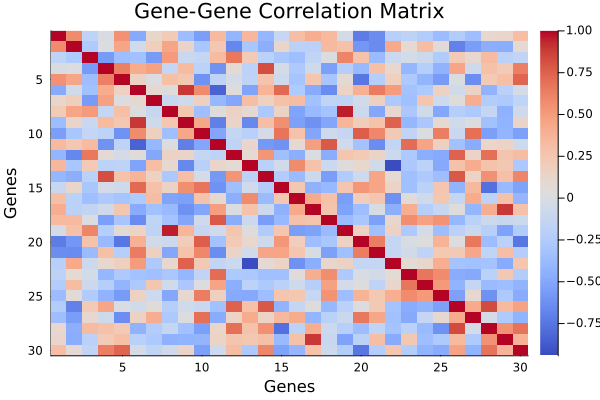

In [19]:
using Statistics, Plots

# Compute correlation between genes
corr_matrix = cor(expr_log, dims=2)

heatmap(corr_matrix,
        xlabel="Genes",
        ylabel="Genes",
        yflip=true,
        c=:coolwarm,
        title="Gene-Gene Correlation Matrix")

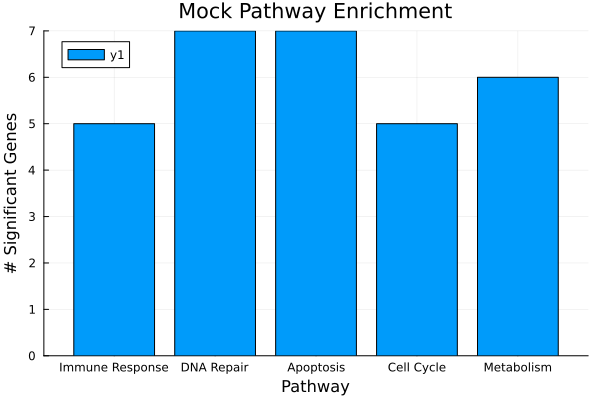

In [32]:
using Random, DataFrames, Plots

# Simulated gene universe
genes = ["Gene_$i" for i in 1:200]

# Randomly assign to 5 mock pathways
pathways = ["Apoptosis", "Cell Cycle", "Immune Response", "Metabolism", "DNA Repair"]
gene2path = Dict(g => rand(pathways) for g in genes)

# Pretend we detected 30 significant genes
sig_genes = sample(genes, 30; replace=false)

# Count enrichment (hypergeometric test simplified to proportions)
counts = Dict(p => count(g -> gene2path[g] == p, sig_genes) for p in pathways)

df_path = DataFrame(Pathway=collect(keys(counts)), SigGenes=collect(values(counts)))

# Barplot enrichment
bar(df_path.Pathway, df_path.SigGenes,
    xlabel="Pathway",
    ylabel="# Significant Genes",
    title="Mock Pathway Enrichment")

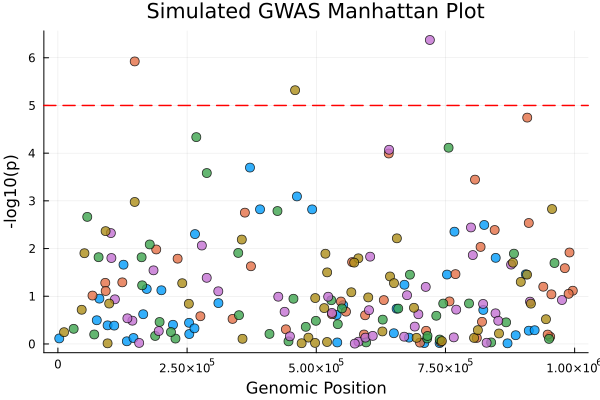

In [24]:
using Random, Plots

# Simulate SNP positions and p-values
n_snps = 200
chromosomes = repeat(1:5, inner=n_snps÷5)
positions = [rand(1:1_000_000) for _ in 1:n_snps]
pvals = rand(n_snps).^3   # bias towards small values

df_gwas = DataFrame(Chr=chromosomes, Pos=positions, Pval=pvals)

# Manhattan plot
scatter(df_gwas.Pos, -log10.(df_gwas.Pval),
        group=df_gwas.Chr,
        xlabel="Genomic Position",
        ylabel="-log10(p)",
        title="Simulated GWAS Manhattan Plot",
        legend=false,
        alpha=0.8,
        markersize=5)
hline!([5], color=:red, linestyle=:dash, lw=1.5)   # genome-wide cutoff

Sequence: ATGCGTACGTAGCTAGCTA | GC content = 47.37%
Sequence: GGGCGCGTTTATATGCGC | GC content = 61.11%
Sequence: ATATATATATATATATAT | GC content = 0.0%
Sequence: CGCGCGCGCGCGCGCGCG | GC content = 100.0%


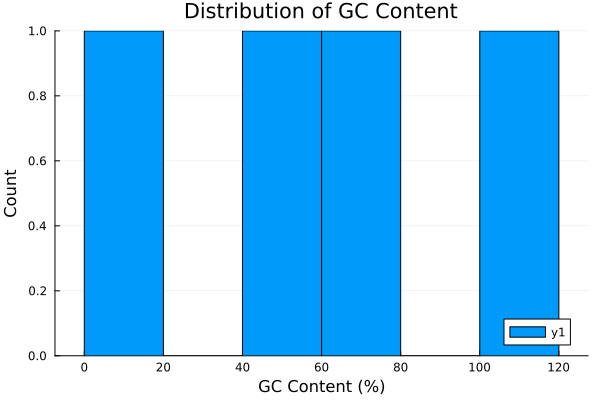

In [25]:
using Statistics

# Simulated DNA FASTA-like sequences
seqs = ["ATGCGTACGTAGCTAGCTA",
        "GGGCGCGTTTATATGCGC",
        "ATATATATATATATATAT",
        "CGCGCGCGCGCGCGCGCG"]

function gc_content(seq::String)
    gc = count(ch -> ch in ['G','C'], seq)
    return gc / length(seq) * 100   # percent
end

gc_vals = [gc_content(s) for s in seqs]

for (s,v) in zip(seqs, gc_vals)
    println("Sequence: $s | GC content = $(round(v,digits=2))%")
end

# Histogram of GC %
histogram(gc_vals, bins=5,
          xlabel="GC Content (%)",
          ylabel="Count",
          title="Distribution of GC Content")

In [28]:
# Example FASTA string
fasta_data = """
>Gene1
ATGCTAGCTAGCTACGATCG
>Gene2
GGGGCCCATTTTACGTAGC
>Gene3
TATATATATATCGCGCGC
"""

function parse_fasta(fasta::String)
    seqs = Dict{String,String}()
    current_header = ""
    for line in split(fasta, '\n')
        if startswith(line, ">")
            current_header = strip(line[2:end])
            seqs[current_header] = ""
        elseif !isempty(strip(line))
            seqs[current_header] *= strip(line)
        end
    end
    return seqs
end

parsed = parse_fasta(fasta_data)
println(parsed)

Dict("Gene2" => "GGGGCCCATTTTACGTAGC", "Gene3" => "TATATATATATCGCGCGC", "Gene1" => "ATGCTAGCTAGCTACGATCG")


In [30]:
# Minimal codon table
codon_table = Dict(
    "ATG"=>"M", "TTT"=>"F","TTC"=>"F","TTA"=>"L","TTG"=>"L",
    "TAA"=>"*", "TAG"=>"*", "TGA"=>"*",   # stop codons
    "GCT"=>"A","GCC"=>"A","GCA"=>"A","GCG"=>"A"
)

function translate_dna(seq::String)
    seq = uppercase(seq)
    protein = ""
    for i in 1:3:length(seq)-2
        codon = seq[i:i+2]
        aa = get(codon_table, codon, "X")  # unknown codon = X
        protein *= aa
    end
    return protein
end

dna_seq = "ATGGCTTTAGCCGTAATGA"
println("DNA: $dna_seq")
println("Protein: ", translate_dna(dna_seq))

DNA: ATGGCTTTAGCCGTAATGA
Protein: MALAXM


In [31]:
# Mock aligned sequences (same length, gaps with "-")
msa = [
    "ATGCTAGC--TAG",
    "ATG-TAGCTATAG",
    "ATGCTAGCT-TAG"
]

# Function to pretty-print with column consensus
function consensus(msa::Vector{String})
    consensus_seq = ""
    for i in 1:length(msa[1])
        col = [msa[j][i] for j in 1:length(msa)]
        counts = Dict(ch => count(==(ch), col) for ch in unique(col))
        top = findmax(counts)[2]
        consensus_seq *= top
    end
    return consensus_seq
end

println("Multiple Sequence Alignment:")
for seq in msa
    println(seq)
end
println("Consensus: ", consensus(msa))

Multiple Sequence Alignment:
ATGCTAGC--TAG
ATG-TAGCTATAG
ATGCTAGCT-TAG
Consensus: ATGCTAGCT-TAG


In [33]:
using Random, Plots

# Simulated genes
genes = ["G$i" for i in 1:8]

# Random directed interactions
edges = [(rand(genes), rand(genes)) for _ in 1:12]

# Simple visualization (circle layout)
θ = range(0, 2π, length=length(genes)+1)[1:end-1]
coords = [(cos(t), sin(t)) for t in θ]

scatter([c[1] for c in coords], [c[2] for c in coords],
        markersize=10, color=:lightblue, label=false,
        title="Mock Gene Regulatory Network")
annotate!(coords, genes)

for (src,tgt) in edges
    i, j = findfirst(==(src), genes), findfirst(==(tgt), genes)
    plot!([coords[i][1], coords[j][1]], [coords[i][2], coords[j][2]],
          arrow=true, color=:gray, label=false)
end

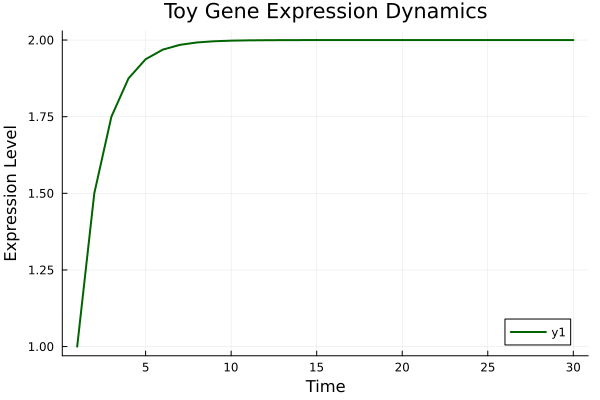

In [34]:
using LinearAlgebra

# Parameters
α, β = 1.0, 0.5      # synthesis & degradation rates
T = 30               # time steps
expr = zeros(T)

expr[1] = 1.0
for t in 2:T
    expr[t] = expr[t-1] + α - β*expr[t-1]
end

plot(1:T, expr,
     xlabel="Time",
     ylabel="Expression Level",
     title="Toy Gene Expression Dynamics",
     lw=2, color=:darkgreen)

In [35]:
# Protein schematic (length = 500 AA)
length_protein = 500
domains = [
    (50, 150, "Domain A", :lightblue),
    (200, 300, "Domain B", :orange),
    (350, 450, "Domain C", :green)
]

plot(; xlim=(0, length_protein), ylim=(0,1),
     xlabel="Amino Acid Position", ylabel="",
     yticks=[], title="Protein Domain Architecture")

for (start, stop, name, col) in domains
    plot!([start, stop], [0.5, 0.5],
          lw=15, color=col, label=name)
end

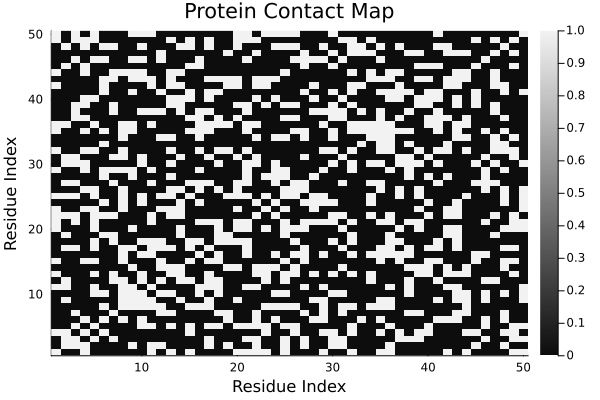

In [36]:
using Random, LinearAlgebra, Plots

# Protein length (e.g., 50 amino acids)
n = 50
Random.seed!(7)

# Simulated residue–residue distances
dist_matrix = rand(n, n) * 10
dist_matrix = (dist_matrix + dist_matrix') / 2   # symmetric
for i in 1:n
    dist_matrix[i,i] = 0
end

# Contact map: 1 if distance < 4 Å
contact_map = dist_matrix .< 4.0

heatmap(contact_map,
        xlabel="Residue Index",
        ylabel="Residue Index",
        title="Protein Contact Map",
        c=:grays)

In [37]:
proteins = ["P$i" for i in 1:12]
ppi_edges = [(rand(proteins), rand(proteins)) for _ in 1:20]

# Circle layout
θ = range(0, 2π, length=length(proteins)+1)[1:end-1]
coords = [(cos(t), sin(t)) for t in θ]

scatter([c[1] for c in coords], [c[2] for c in coords],
        markersize=12, color=:lightgreen,
        title="Protein–Protein Interaction Network",
        legend=false)
annotate!(coords, proteins)

for (src,tgt) in ppi_edges
    i, j = findfirst(==(src), proteins), findfirst(==(tgt), proteins)
    plot!([coords[i][1], coords[j][1]], [coords[i][2], coords[j][2]],
          arrow=true, color=:gray, lw=1, label=false)
end

5×3 DataFrame
 Row │ Gene    RNA    Protein
     │ String  Int64  Int64
─────┼────────────────────────
   1 │ Gene_1     61       17
   2 │ Gene_2    357      393
   3 │ Gene_3    489      465
   4 │ Gene_4    486      472
   5 │ Gene_5    448      479


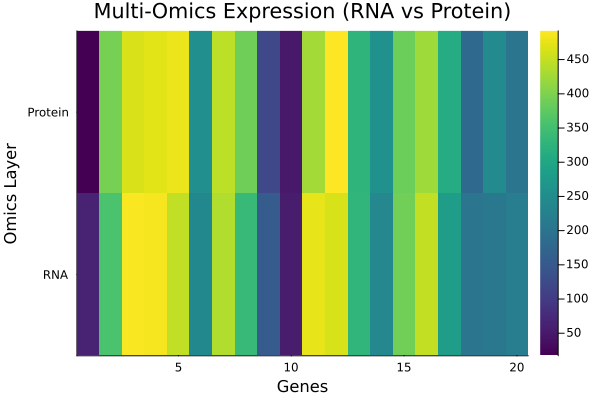

In [38]:
using DataFrames

n_genes = 20
genes = ["Gene_$i" for i in 1:n_genes]

# Simulated transcript (RNA) vs protein expression
rna_expr = rand(50:500, n_genes)
prot_expr = rna_expr .+ rand(-50:50, n_genes)

df_multi = DataFrame(Gene=genes, RNA=rna_expr, Protein=prot_expr)

println(first(df_multi, 5))

# Heatmap side-by-side
expr_matrix = hcat(rna_expr, prot_expr)

heatmap(expr_matrix',
        xlabel="Genes",
        ylabel="Omics Layer",
        yticks=(1:2, ["RNA","Protein"]),
        title="Multi‑Omics Expression (RNA vs Protein)",
        color=:viridis)

5×5 DataFrame
 Row │ SNP     Position  Ref     Alt     AF
     │ String  Int64     String  String  Float64
─────┼────────────────────────────────────────────
   1 │ rs1       126070  A       G       0.332503
   2 │ rs2       162427  G       T       0.962159
   3 │ rs3       162745  A       G       0.830837
   4 │ rs4       175073  T       A       0.335669
   5 │ rs5       178029  T       C       0.432742


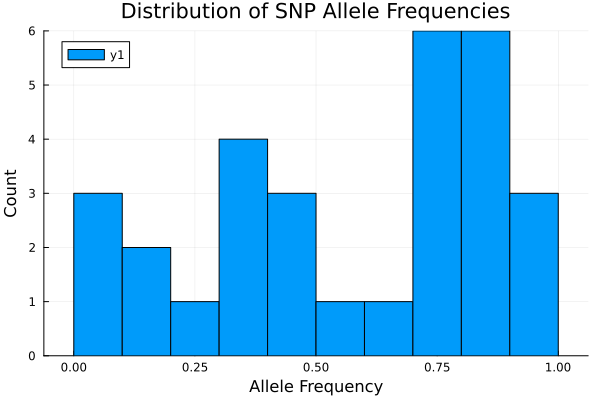

In [39]:
using Random, DataFrames, Plots

Random.seed!(101)

n_snps = 30
positions = sort(rand(1:1_000_000, n_snps))
ref_alleles = ["A","C","G","T"]
alt_alleles = ["C","G","T","A"]

df_snps = DataFrame(
    SNP = ["rs$i" for i in 1:n_snps],
    Position = positions,
    Ref = [rand(ref_alleles) for _ in 1:n_snps],
    Alt = [rand(alt_alleles) for _ in 1:n_snps],
    AF = rand(n_snps)  # allele frequency
)

println(first(df_snps, 5))

# Allele frequency distribution
histogram(df_snps.AF,
          bins=10,
          xlabel="Allele Frequency",
          ylabel="Count",
          title="Distribution of SNP Allele Frequencies")

In [40]:
using Random

species = ["Sp1","Sp2","Sp3","Sp4","Sp5"]
Random.seed!(42)

# Fake distance matrix
distances = rand(5,5)
distances = (distances + distances')/2
for i in 1:5
    distances[i,i]=0
end

println("Pairwise distances:")
println(distances)

# Simple tree-like plotting (radial layout)
θ = range(0, 2π, length=length(species)+1)[1:end-1]
coords = [(cos(t), sin(t)) for t in θ]

scatter([c[1] for c in coords], [c[2] for c in coords],
        markersize=8, color=:orange,
        title="Mock Phylogenetic Tree",
        legend=false)
annotate!(coords, species)

# Connect to a common center
for c in coords
    plot!([0,c[1]], [0,c[2]], color=:gray, lw=1, label=false)
end

Pairwise distances:
[0.0 0.4023418780631292 0.40167177366832957 0.39454292455846707 0.5809977616448418; 0.4023418780631292 0.0 0.6183383853921427 0.5038712040982203 0.4658834513971696; 0.40167177366832957 0.6183383853921427 0.0 0.581033846349565 0.5037341564853477; 0.39454292455846707 0.5038712040982203 0.581033846349565 0.0 0.4336583787321371; 0.5809977616448418 0.4658834513971696 0.5037341564853477 0.4336583787321371 0.0]


In [41]:
using Random

species = ["Sp1","Sp2","Sp3","Sp4","Sp5"]
Random.seed!(42)

# Fake distance matrix
distances = rand(5,5)
distances = (distances + distances')/2
for i in 1:5
    distances[i,i]=0
end

println("Pairwise distances:")
println(distances)

# Simple tree-like plotting (radial layout)
θ = range(0, 2π, length=length(species)+1)[1:end-1]
coords = [(cos(t), sin(t)) for t in θ]

scatter([c[1] for c in coords], [c[2] for c in coords],
        markersize=8, color=:orange,
        title="Mock Phylogenetic Tree",
        legend=false)
annotate!(coords, species)

# Connect to a common center
for c in coords
    plot!([0,c[1]], [0,c[2]], color=:gray, lw=1, label=false)
end

Pairwise distances:
[0.0 0.4023418780631292 0.40167177366832957 0.39454292455846707 0.5809977616448418; 0.4023418780631292 0.0 0.6183383853921427 0.5038712040982203 0.4658834513971696; 0.40167177366832957 0.6183383853921427 0.0 0.581033846349565 0.5037341564853477; 0.39454292455846707 0.5038712040982203 0.581033846349565 0.0 0.4336583787321371; 0.5809977616448418 0.4658834513971696 0.5037341564853477 0.4336583787321371 0.0]


In [42]:
using Plots

# Simulated genome coordinates (1 Mb region)
region_start, region_end = 0, 1_000_000

# Gene annotations
genes = [
    ("GeneA",100_000,200_000),
    ("GeneB",400_000,550_000),
    ("GeneC",700_000,850_000)
]

plot(; xlim=(region_start, region_end),
     ylim=(0,3),
     xlabel="Genomic Position",
     ylabel="Feature",
     title="Genome Browser‑Style Track",
     legend=false)

for (i,(g,s,e)) in enumerate(genes)
    plot!([s,e],[i,i], lw=6, label=g)
    annotate!((s+(e-s)/2, i+0.2, g))
end

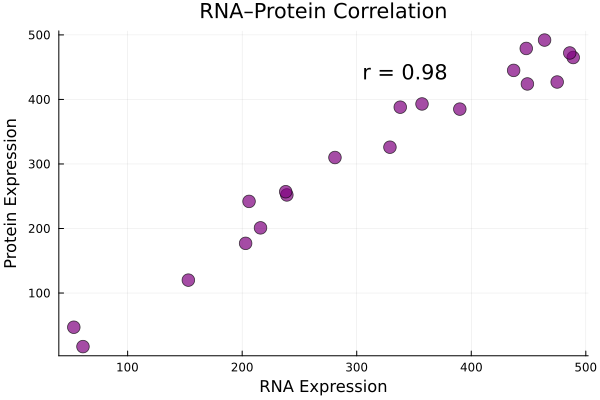

In [43]:
using Statistics, Plots

# From earlier multi-omics example
rna = df_multi.RNA
prot = df_multi.Protein

scatter(rna, prot,
        xlabel="RNA Expression",
        ylabel="Protein Expression",
        title="RNA–Protein Correlation",
        markersize=7, color=:purple, alpha=0.7, legend=false)

r = cor(rna, prot)
annotate!([(maximum(rna)*0.7, maximum(prot)*0.9, "r = $(round(r, digits=2))")])

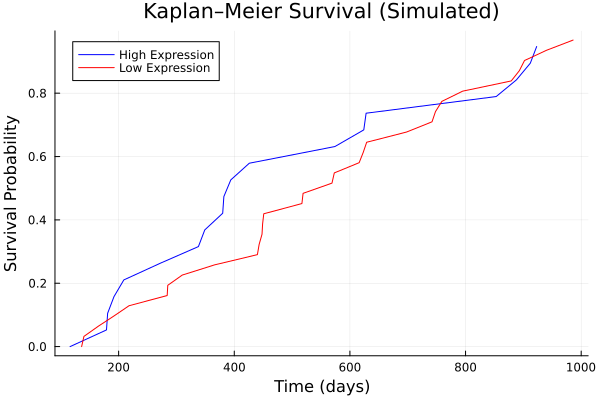

In [44]:
using Random

# Simulated patient survival times (days)
n_patients = 50
Random.seed!(123)
surv_times = rand(100:1000, n_patients)
groups = rand(["High Expression","Low Expression"], n_patients)

# Simple Kaplan–Meier step function
function km_curve(times)
    times_sorted = sort(times, rev=true)
    surv_prob = [prod((length(times)-i)/(length(times)-i+1) for i in 1:j) for j in 1:length(times_sorted)]
    return times_sorted, surv_prob
end

t_high, s_high = km_curve(surv_times[groups .== "High Expression"])
t_low, s_low = km_curve(surv_times[groups .== "Low Expression"])

plot(t_high, s_high, linecolor=:blue, label="High Expression", xlabel="Time (days)", ylabel="Survival Probability", title="Kaplan–Meier Survival (Simulated)")
plot!(t_low, s_low, linecolor=:red, label="Low Expression")

In [45]:
p = histogram(df_snps.AF, bins=10, xlabel="Allele Frequency", ylabel="Count",
              title="Export Example: SNP Allele Frequencies")
savefig(p, "snp_freq_histogram.png")

println("Saved: snp_freq_histogram.png")

Saved: snp_freq_histogram.png
